In [1]:
import pandas as pd

In [2]:
# Import Matplot lib and use the `nbagg` backend

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
 # Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [4]:
 # Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


# Explore database

In [5]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()


['measurements', 'stations']

In [6]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])


station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
 # Use `engine.execute` to select and display the first 10 rows from each table
engine.execute('SELECT * FROM stations LIMIT 10').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
engine.execute('SELECT * FROM measurements limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Reflect database and Query

In [10]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements

In [12]:
 # Start a session to query the database
session = Session(engine)

# Precipitation Analysis

In [13]:
max_date=session.query(func.max(Measurement.date)).all()
max_date

[('2017-08-23')]

In [14]:
# Based on max data of precipitation data, we are going to obtain last 12 months of data

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-09-01').\
filter(Measurement.prcp != None).\
order_by(Measurement.date.desc()).all()

results


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-

In [15]:
len(results)

1968

<IPython.core.display.Javascript object>


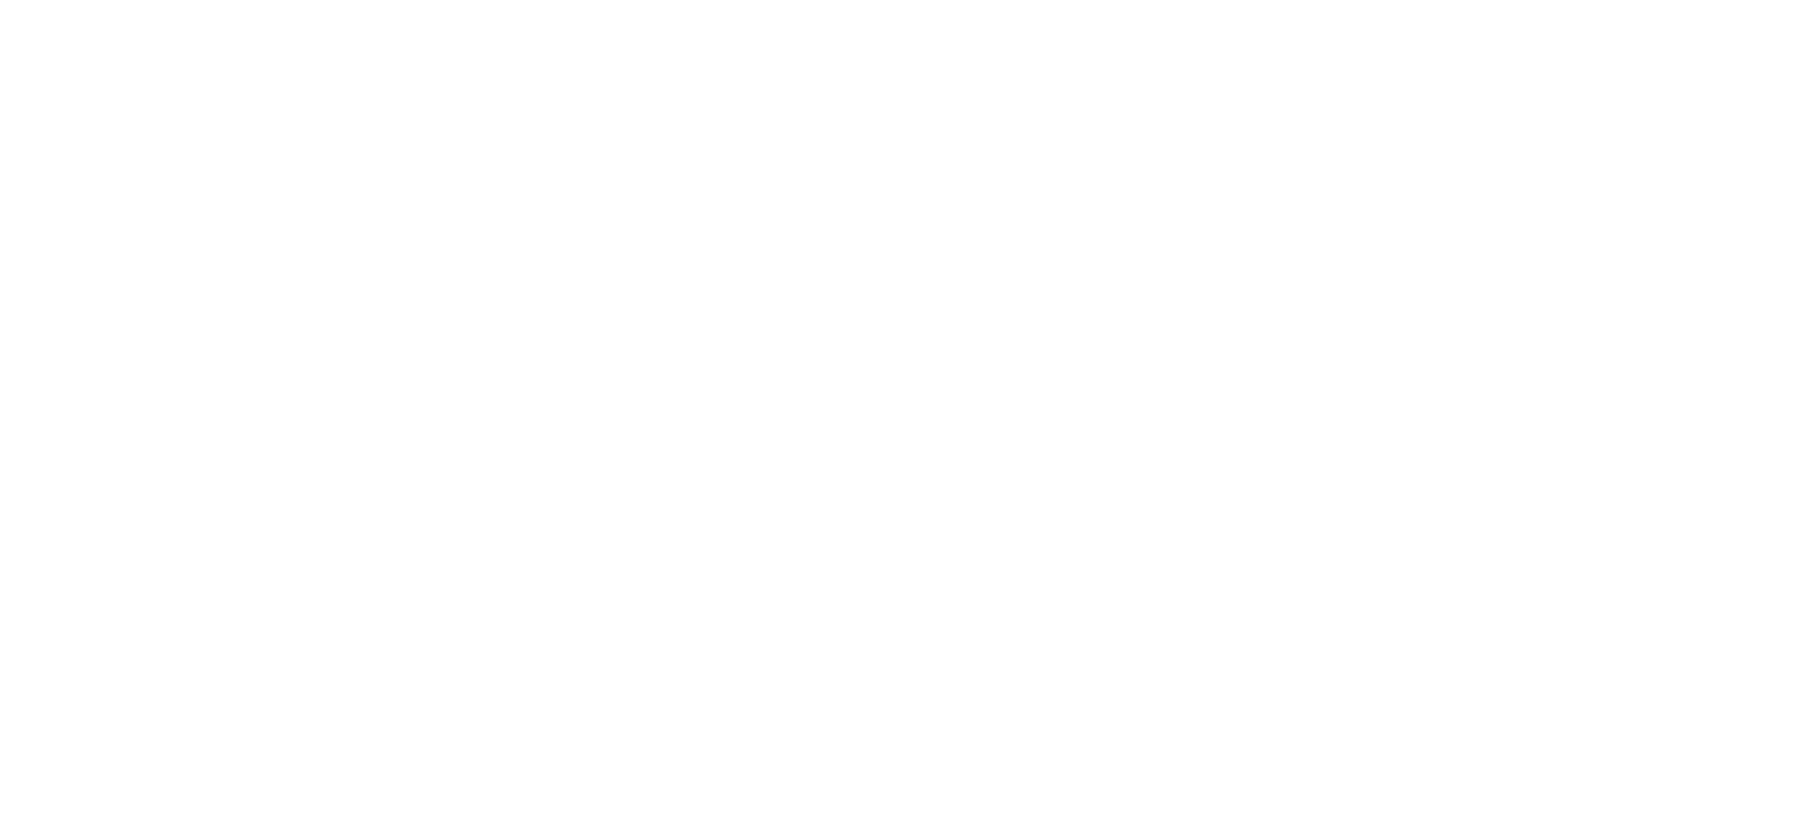

<IPython.core.display.Javascript object>


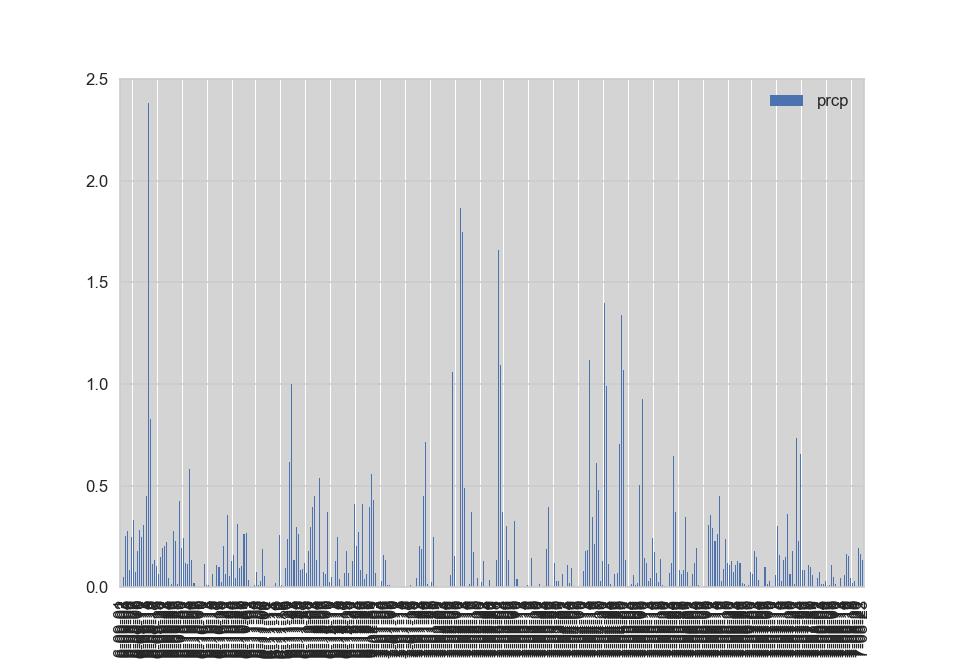

In [19]:
df = pd.DataFrame(results, columns=['date', 'prcp'])

df_summary= df.groupby(["date"])['prcp'].agg(['mean']).sort_index().reset_index()
df_summary= df_summary.rename(columns={"mean":"prcp"})

df_summary.set_index('date', inplace=True)
plt.figure(figsize=(15,7))
df_summary.plot.bar()

plt.show()

# Station Analysis

In [27]:
#Design a query to calculate the total number of stations.

Total_number_stations=session.query(Station.station).count()
print(f"Total number stations: {Total_number_stations}")


Total number stations: 9


In [37]:
data_stations=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all()
data_stations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]